**Opening up LSBoost's engine hood:**

On a classification (`breast_cancer`) dataset. With ridge regression base learners on randomized networks. Plus, sensitivity to lambda (regularization parameter), learning rate, dropout and early stopping

# 0 - dataset and import packages

In [ ]:
!pip install git+https://github.com/Techtonique/mlsauce.git # where mlsauce lives

In [142]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from time import time
from os import chdir
from sklearn import metrics
from tqdm import tqdm
from time import time

import mlsauce as ms # contains LSBoost


# 1 - Classification on breast cancer data

## ridge without early stopping (tolerance=0) and default parameters

100%|██████████| 100/100 [00:00<00:00, 633.33it/s]



ridge -----


training time elapsed: 0.16161751747131348
accuracy: 0.956140350877193
scoring time elapsed: 0.01264500617980957
effective number of iterations 100


Text(0, 0.5, 'log loss')

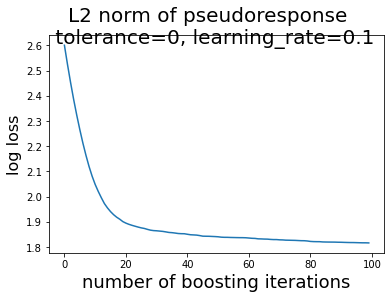

In [143]:
#ridge

print("\n")
print("ridge -----")

# data 1
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
# split data into training test and test set
np.random.seed(1509)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

obj = ms.LSBoostClassifier(tolerance=0) # basically, loop until max iter = M

start = time()
obj.fit(X_train, y_train)
print(f"\n")
print(f"training time elapsed: {time()-start}")

start = time()
print(f"accuracy: {obj.score(X_test, y_test)}")
print(f"scoring time elapsed: {time()-start}")

print(f"effective number of iterations {len(obj.obj['loss'])}")

fig = plt.figure()
plt.plot(np.log(obj.obj['loss']))
fig.suptitle('L2 norm of pseudoresponse \n tolerance=0, learning_rate=0.1', fontsize=20)
plt.xlabel('number of boosting iterations', fontsize=18)
plt.ylabel('log loss', fontsize=16)

100%|██████████| 100/100 [00:00<00:00, 605.76it/s]




training time elapsed: 0.1697995662689209
accuracy: 0.9298245614035088
scoring time elapsed: 0.012651205062866211
effective number of iterations 100


Text(0, 0.5, 'log loss')

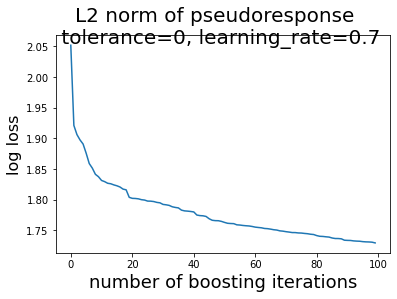

In [144]:
obj = ms.LSBoostClassifier(tolerance=0, learning_rate=0.7)

start = time()
obj.fit(X_train, y_train)
print(f"\n")
print(f"training time elapsed: {time()-start}")

start = time()
print(f"accuracy: {obj.score(X_test, y_test)}")
print(f"scoring time elapsed: {time()-start}")

print(f"effective number of iterations {len(obj.obj['loss'])}")

# plt.ylim([1.6, 2.7])
# plt.xlim([0, 100])
fig = plt.figure()
plt.plot(np.log(obj.obj['loss']))
fig.suptitle('L2 norm of pseudoresponse \n tolerance=0, learning_rate=0.7', fontsize=20)
plt.xlabel('number of boosting iterations', fontsize=18)
plt.ylabel('log loss', fontsize=16)

## ridge with early stopping (tolerance=1e-1)

 16%|█▌        | 16/100 [00:00<00:00, 501.34it/s]



training time elapsed: 0.035997867584228516
accuracy: 0.9736842105263158
scoring time elapsed: 0.00895380973815918
effective number of iterations 17


Text(0, 0.5, 'log loss')

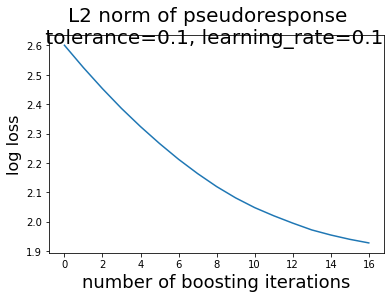

In [145]:
obj = ms.LSBoostClassifier(tolerance=1e-1) #learning rate is 0.1

start = time()
obj.fit(X_train, y_train)
print(f"\n")
print(f"training time elapsed: {time()-start}")

start = time()
print(f"accuracy: {obj.score(X_test, y_test)}")
print(f"scoring time elapsed: {time()-start}")

print(f"effective number of iterations {len(obj.obj['loss'])}")

fig = plt.figure()
plt.plot(np.log(obj.obj['loss']))
fig.suptitle('L2 norm of pseudoresponse \n tolerance=0.1, learning_rate=0.1', fontsize=20)
plt.xlabel('number of boosting iterations', fontsize=18)
plt.ylabel('log loss', fontsize=16)

  3%|▎         | 3/100 [00:00<00:00, 239.37it/s]




training time elapsed: 0.020142793655395508
accuracy: 0.9736842105263158
scoring time elapsed: 0.0017046928405761719
effective number of iterations 4


Text(0, 0.5, 'log loss')

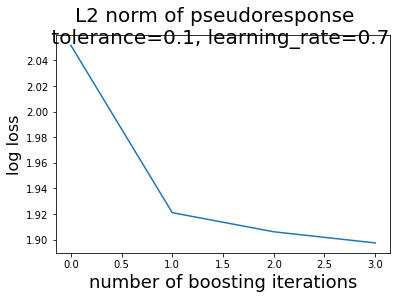

In [146]:
obj = ms.LSBoostClassifier(tolerance=1e-1, learning_rate=0.7)

start = time()
obj.fit(X_train, y_train)
print(f"\n")
print(f"training time elapsed: {time()-start}")

start = time()
print(f"accuracy: {obj.score(X_test, y_test)}")
print(f"scoring time elapsed: {time()-start}")

print(f"effective number of iterations {len(obj.obj['loss'])}")

fig = plt.figure()
plt.plot(np.log(obj.obj['loss']))
fig.suptitle('L2 norm of pseudoresponse \n tolerance=0.1, learning_rate=0.7', fontsize=20)
plt.xlabel('number of boosting iterations', fontsize=18)
plt.ylabel('log loss', fontsize=16)

# 2 - Sensitivity to lambda, learning rate, dropout and early stopping

In [51]:
import pandas as pd

## 2 - 1 to lambda

In [52]:
B = 50 # number of subsampling ops

lambdas = np.sort([1e-3, 1e-2, 1e-1, 0, 10, 100, 1000])
n_lambdas = len(lambdas)
training_errs_1 = np.zeros((B, n_lambdas))
testing_errs_1 = np.zeros((B, n_lambdas))

In [ ]:
for idx in tqdm(range(B)): 
  np.random.seed(idx*100+15029)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  for idy, elt in enumerate(lambdas):  
    obj = ms.LSBoostClassifier(reg_lambda = elt)
    obj.fit(X_train, y_train)
    training_errs_1[idx, idy] = obj.score(X_train, y_train)
    testing_errs_1[idx, idy] = obj.score(X_test, y_test)    

In [54]:
colnames = [('lam' + str(elt))  for elt in lambdas]
df_training_errs_1 =  pd.DataFrame(training_errs_1, columns=colnames)
df_testing_errs_1 = pd.DataFrame(testing_errs_1, columns=colnames)

In [ ]:
df_training_errs_1.describe()

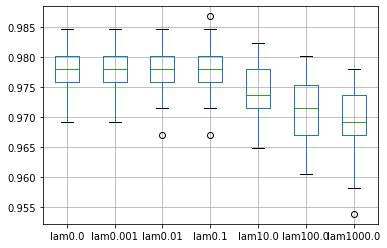

In [56]:
df_training_errs_1.boxplot(column=colnames)

In [57]:
df_testing_errs_1.describe()

,lam0.0,lam0.001,lam0.01,lam0.1,lam10.0,lam100.0,lam1000.0
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.958772,0.958772,0.958772,0.959123,0.960175,0.961579,0.961053
std,0.017920,0.017920,0.017920,0.017146,0.017917,0.018830,0.020755
min,0.903509,0.903509,0.903509,0.912281,0.912281,0.912281,0.894737
25%,0.947368,0.947368,0.947368,0.949561,0.947368,0.956140,0.949561
50%,0.956140,0.956140,0.956140,0.956140,0.956140,0.960526,0.964912
75%,0.973684,0.973684,0.973684,0.973684,0.973684,0.973684,0.973684
max,0.991228,0.991228,0.991228,0.991228,1.000000,1.000000,1.000000


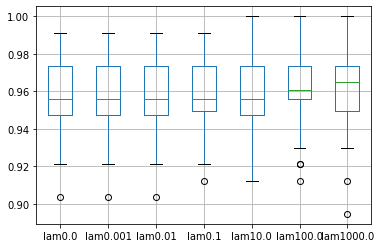

In [58]:
df_testing_errs_1.boxplot(column=colnames)

## 2 - 2 to nu (learning rate)

In [59]:
nus = np.sort([1e-3, 2.5e-3, 5e-3, 5e-2, 2.5e-2, 1e-2, 1e-1])

In [60]:
colnames = [('nu' + str(elt))  for elt in nus]

In [61]:
n_nus = len(nus)
training_errs_2 = np.zeros((B, n_nus))
testing_errs_2 = np.zeros((B, n_nus))

In [ ]:
for idx in tqdm(range(B)): 
  np.random.seed(idx*100+15029)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  for idy, elt in enumerate(nus):  
    obj = ms.LSBoostClassifier(learning_rate=elt)
    obj.fit(X_train, y_train)
    training_errs_2[idx, idy] = obj.score(X_train, y_train)
    testing_errs_2[idx, idy] = obj.score(X_test, y_test)    

### training and testing errors = f(learning rate)

In [63]:
df_training_errs_2 =  pd.DataFrame(training_errs_2, columns=colnames)
df_testing_errs_2 = pd.DataFrame(testing_errs_2, columns=colnames)

In [ ]:
df_training_errs_2.describe()

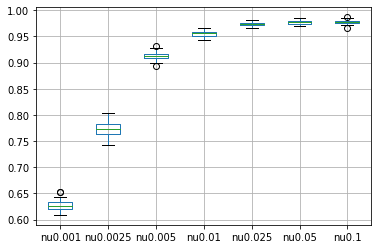

In [65]:
df_training_errs_2.boxplot(column=colnames)

In [ ]:
df_testing_errs_2.describe()

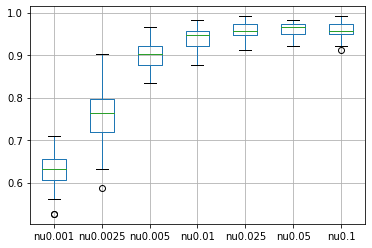

In [67]:
df_testing_errs_2.boxplot(column=colnames)

## 2 - 3 to dropout

In [68]:
dropouts = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [69]:
colnames = [('dropout' + str(elt))  for elt in dropouts]

In [70]:
n_dropouts = len(dropouts)
training_errs_3 = np.zeros((B, n_dropouts))
testing_errs_3 = np.zeros((B, n_dropouts))

In [ ]:
for idx in tqdm(range(B)): 
  np.random.seed(idx*100+15029)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  for idy, elt in enumerate(dropouts):  
    obj = ms.LSBoostClassifier(dropout=elt)
    obj.fit(X_train, y_train)
    training_errs_3[idx, idy] = obj.score(X_train, y_train)
    testing_errs_3[idx, idy] = obj.score(X_test, y_test)    

### training and testing errors (=f(dropout))

In [72]:
df_training_errs_3 =  pd.DataFrame(training_errs_3, columns=colnames)
df_testing_errs_3 = pd.DataFrame(testing_errs_3, columns=colnames)

In [ ]:
df_training_errs_3.describe()

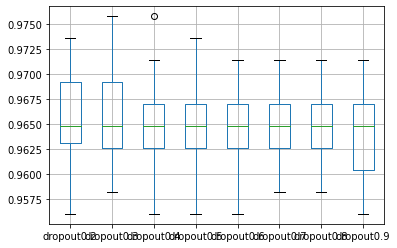

In [74]:
df_training_errs_3.boxplot(column=colnames)

In [75]:
df_testing_errs_3.describe()

,dropout0.2,dropout0.3,dropout0.4,dropout0.5,dropout0.6,dropout0.7,dropout0.8,dropout0.9
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.957018,0.955614,0.955614,0.955614,0.955439,0.955439,0.954561,0.955614
std,0.018181,0.018195,0.017310,0.018022,0.018232,0.017619,0.018133,0.017310
min,0.921053,0.912281,0.921053,0.921053,0.921053,0.921053,0.921053,0.921053
25%,0.947368,0.947368,0.947368,0.940789,0.940789,0.940789,0.940789,0.947368
50%,0.956140,0.956140,0.956140,0.956140,0.956140,0.956140,0.956140,0.956140
75%,0.973684,0.971491,0.971491,0.971491,0.971491,0.964912,0.964912,0.971491
max,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.991228,0.982456


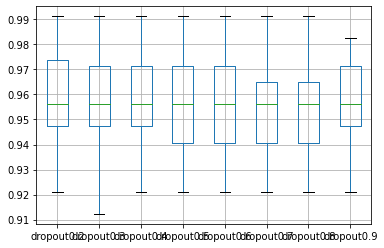

In [76]:
df_testing_errs_3.boxplot(column=colnames)

## 2-4 to early stopping (`tolerance`)

In [77]:
tolerances = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [78]:
colnames = [('tol' + str(elt))  for elt in tolerances]

In [79]:
n_tolerances = len(tolerances)
training_errs_4 = np.zeros((B, n_tolerances))
testing_errs_4 = np.zeros((B, n_tolerances))
timings_errs_4 = np.zeros((B, n_tolerances))
estimators_errs_4 = np.zeros((B, n_tolerances))

In [ ]:
for idx in tqdm(range(B)): 
  np.random.seed(idx*100+15029)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  for idy, elt in enumerate(tolerances):  
    obj = ms.LSBoostClassifier(tolerance=elt)
    start = time()
    obj.fit(X_train, y_train)
    training_errs_4[idx, idy] = obj.score(X_train, y_train)
    testing_errs_4[idx, idy] = obj.score(X_test, y_test) 
    timings_errs_4[idx, idy] = time() - start
    estimators_errs_4[idx, idy] = obj.n_estimators   

### 2-4-1 training and testing errors

In [81]:
df_training_errs_4 =  pd.DataFrame(training_errs_4, columns=colnames)
df_testing_errs_4 = pd.DataFrame(testing_errs_4, columns=colnames)

In [ ]:
df_training_errs_4.describe()

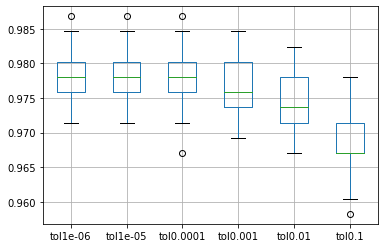

In [83]:
df_training_errs_4.boxplot(column=colnames)

In [84]:
df_testing_errs_4.describe()

,tol1e-06,tol1e-05,tol0.0001,tol0.001,tol0.01,tol0.1
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.958246,0.958246,0.959123,0.960000,0.958772,0.954737
std,0.018035,0.018035,0.017146,0.016064,0.016742,0.019763
min,0.912281,0.912281,0.912281,0.921053,0.912281,0.912281
25%,0.947368,0.947368,0.949561,0.947368,0.947368,0.938596
50%,0.956140,0.956140,0.956140,0.964912,0.964912,0.956140
75%,0.973684,0.973684,0.973684,0.973684,0.973684,0.964912
max,0.991228,0.991228,0.991228,0.982456,0.991228,1.000000


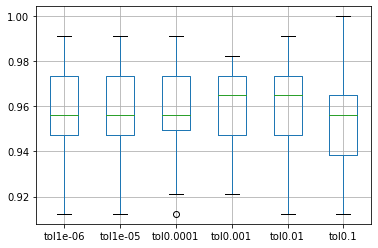

In [85]:
df_testing_errs_4.boxplot(column=colnames)

In [86]:
df_timings_errs_4 =  pd.DataFrame(timings_errs_4, columns=colnames)


In [87]:
df_timings_errs_4.describe()

,tol1e-06,tol1e-05,tol0.0001,tol0.001,tol0.01,tol0.1
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.243704,0.247386,0.236359,0.130760,0.085511,0.056796
std,0.012296,0.014145,0.032336,0.016880,0.009051,0.006331
min,0.220450,0.206175,0.133323,0.095817,0.071045,0.047695
25%,0.233942,0.239999,0.230145,0.120973,0.077876,0.052571
50%,0.243681,0.249516,0.240418,0.129118,0.084710,0.055660
75%,0.252011,0.255483,0.253721,0.137501,0.091828,0.059923
max,0.272326,0.285608,0.296420,0.179760,0.110666,0.078058


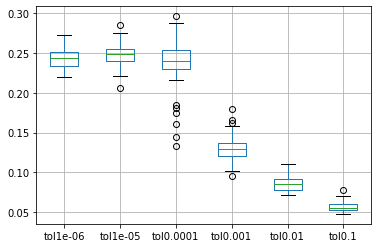

In [88]:
df_timings_errs_4.boxplot(column=colnames)

##

In [89]:
df_estimators_errs_4 =  pd.DataFrame(estimators_errs_4, columns=colnames)


In [90]:
df_estimators_errs_4.describe()

,tol1e-06,tol1e-05,tol0.0001,tol0.001,tol0.01,tol0.1
count,50.0,50.0,50.000000,50.000000,50.000000,50.000000
mean,100.0,100.0,94.820000,50.940000,29.540000,15.760000
std,0.0,0.0,12.775439,4.933889,0.503457,0.431419
min,100.0,100.0,58.000000,39.000000,29.000000,15.000000
25%,100.0,100.0,100.000000,47.000000,29.000000,16.000000
50%,100.0,100.0,100.000000,53.000000,30.000000,16.000000
75%,100.0,100.0,100.000000,53.000000,30.000000,16.000000
max,100.0,100.0,100.000000,58.000000,30.000000,16.000000


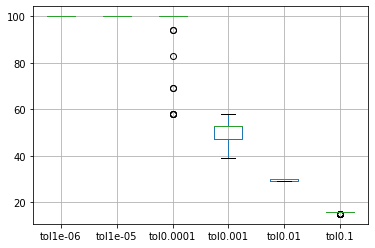

In [91]:
df_estimators_errs_4.boxplot(column=colnames)